#### Malwina Wojewoda
# Task 3.
Implement your own version of bagging algorithm. You can use available implementations of decision trees (or other base learners). Compare the accuracy (compute for different train-test splits) of bagging and single tree using two datasetes.

In [162]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Bagging Classifier

In [71]:
class BaggingTreesClassifier:
    def __init__(self, n_trees=10):
        self.n_trees = n_trees
        self.trees = []
        
    def fit(self, X, y):
        for _ in range(self.n_trees):
            idx = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_bootstrap = X.iloc[idx]
            y_bootstrap = y.iloc[idx]
            tree = DecisionTreeClassifier()
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)
    
    def predict_proba(self, X):
        trees_probas = []
        for tree in self.trees:
            tree_proba= tree.predict_proba(X)
            trees_probas.append(tree_proba)

        avg_proba = np.mean(trees_probas, axis=0)
        return avg_proba
    
    def predict(self, X):
        avg_proba = self.predict_proba(X)
        return np.argmax(avg_proba, axis=1)     

# Bagging Regressor

In [165]:
class BaggingTreesRegressor:
    def __init__(self, n_trees=10):
        self.n_trees = n_trees
        self.trees = []
        
    def fit(self, X, y):
        for _ in range(self.n_trees):
            idx = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_bootstrap = X.iloc[idx]
            y_bootstrap = y.iloc[idx]
            tree = DecisionTreeRegressor()
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)    

# Comparison of bagging and single model results
### Classification

In [204]:
df = pd.read_csv('data/SAheart.data')
df['famhist'] = df['famhist'].apply(lambda x: 1 if x == 'Present' else 0)
y = df['chd']
X = df.drop('chd', axis=1)

In [205]:
def evaluate_classification(X_train, X_test, y_train, y_test, n_times=10, n_trees=100):
    bagging_accuracies = []
    single_accuracies = []
    for _ in range(n_times): 
        bagging_classifier = BaggingTreesClassifier(n_trees=n_trees)
        bagging_classifier.fit(X_train, y_train)
        bagging_prediction = bagging_classifier.predict(X_test)
        bagging_accuracy = accuracy_score(y_test, bagging_prediction)

        single_classifier = DecisionTreeClassifier()
        single_classifier.fit(X_train, y_train)
        single_prediction = single_classifier.predict(X_test)
        single_accuracy = accuracy_score(y_test, single_prediction)

        bagging_accuracies.append(bagging_accuracy)
        single_accuracies.append(single_accuracy)

    return bagging_accuracies, single_accuracies

In [206]:
test_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
bagging_accuracies_list = []
single_accuracies_list = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    bagging_avg_accuracy, single_avg_accuracy = evaluate_classification(X_train, X_test, y_train, y_test, n_times=20, n_trees=100)

    bagging_accuracies_list.append(bagging_avg_accuracy)
    single_accuracies_list.append(single_avg_accuracy)

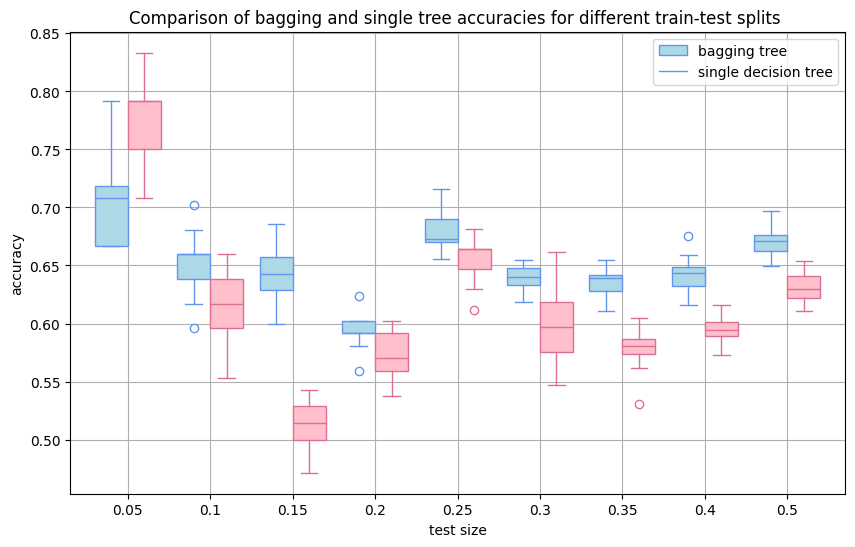

In [207]:
plt.figure(figsize=(10, 6))
color1 = 'lightblue'
color1_1 = 'cornflowerblue'
color2 = 'pink'
color2_1 = 'palevioletred'
plt.boxplot(bagging_accuracies_list, positions=np.arange(len(test_sizes)) - 0.2, widths=0.4, patch_artist=True, boxprops=dict(facecolor=color1, color=color1_1), capprops=dict(color=color1_1),whiskerprops=dict(color=color1_1), flierprops=dict(color=color1_1, markeredgecolor=color1_1),medianprops=dict(color=color1_1))
plt.boxplot(single_accuracies_list, positions=np.arange(len(test_sizes)) + 0.2, widths=0.4, patch_artist=True, boxprops=dict(facecolor=color2, color=color2_1), capprops=dict(color=color2_1),whiskerprops=dict(color=color2_1), flierprops=dict(color=color2_1, markeredgecolor=color2_1),medianprops=dict(color=color2_1))
plt.xticks(range(len(test_sizes)), test_sizes)
plt.xlabel('test size')
plt.ylabel('accuracy')
plt.title('Comparison of bagging and single tree accuracies for different train-test splits ')
plt.legend(['bagging tree', 'single decision tree'])
plt.grid(True)
plt.show()

### Regression

In [208]:
df = pd.read_csv('data/fitness.txt', sep=' ', header=0)
y = df['Oxygen']
X = df.drop('Oxygen', axis=1)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_tree = BaggingTreesRegressor()
regression_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 11.816950651428572


In [210]:
def evaluate_regression(X_train, X_test, y_train, y_test, n_times=10, n_trees=100):
    bagging_mse_values = []
    single_mse_values = []
    for _ in range(n_times): 
        bagging_regressor = BaggingTreesRegressor(n_trees=n_trees)
        bagging_regressor.fit(X_train, y_train)
        bagging_prediction = bagging_regressor.predict(X_test)
        bagging_mse = mean_squared_error(y_test, bagging_prediction)

        single_regressor = DecisionTreeRegressor()
        single_regressor.fit(X_train, y_train)
        single_prediction = single_regressor.predict(X_test)
        single_mse = mean_squared_error(y_test, single_prediction)

        bagging_mse_values.append(bagging_mse)
        single_mse_values.append(single_mse)

    return bagging_mse_values, single_mse_values

In [219]:
test_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
bagging_mse_values_list = []
single_mse_values_list = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    bagging_avg_accuracy, single_avg_accuracy = evaluate_regression(X_train, X_test, y_train, y_test, n_times=20, n_trees=100)

    bagging_mse_values_list.append(bagging_avg_accuracy)
    single_mse_values_list.append(single_avg_accuracy)

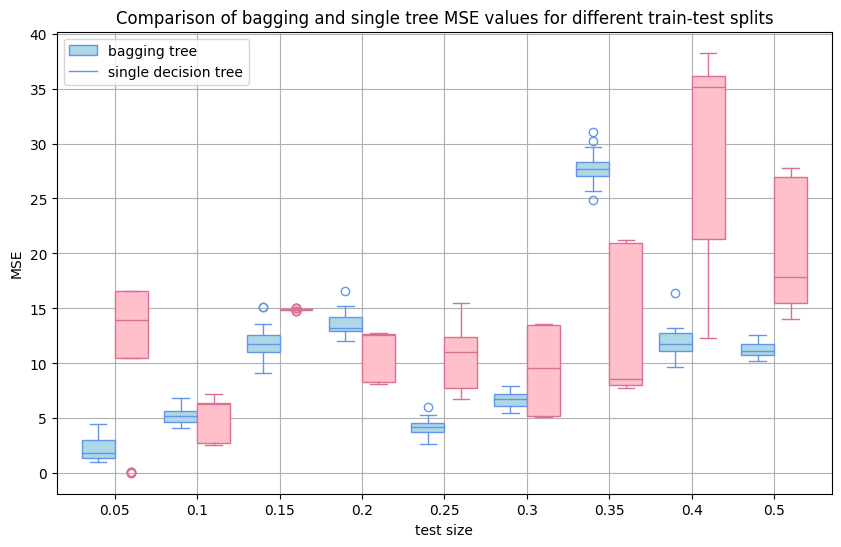

In [220]:
plt.figure(figsize=(10, 6))
color1 = 'lightblue'
color1_1 = 'cornflowerblue'
color2 = 'pink'
color2_1 = 'palevioletred'
plt.boxplot(bagging_mse_values_list, positions=np.arange(len(test_sizes)) - 0.2, widths=0.4, patch_artist=True, boxprops=dict(facecolor=color1, color=color1_1), capprops=dict(color=color1_1),whiskerprops=dict(color=color1_1), flierprops=dict(color=color1_1, markeredgecolor=color1_1),medianprops=dict(color=color1_1))
plt.boxplot(single_mse_values_list, positions=np.arange(len(test_sizes)) + 0.2, widths=0.4, patch_artist=True, boxprops=dict(facecolor=color2, color=color2_1), capprops=dict(color=color2_1),whiskerprops=dict(color=color2_1), flierprops=dict(color=color2_1, markeredgecolor=color2_1),medianprops=dict(color=color2_1))
plt.xticks(range(len(test_sizes)), test_sizes)
plt.xlabel('test size')
plt.ylabel('MSE')
plt.title('Comparison of bagging and single tree MSE values for different train-test splits')
plt.legend(['bagging tree', 'single decision tree'])
plt.grid(True)
plt.show()